In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 10

In [3]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(y_train, nb_classes)
Y_Test = np_utils.to_categorical(y_test, nb_classes)

We have 60,000 28x28 training grayscale images and 10,000 28x28 test grayscale images. Let's visualize some of them.

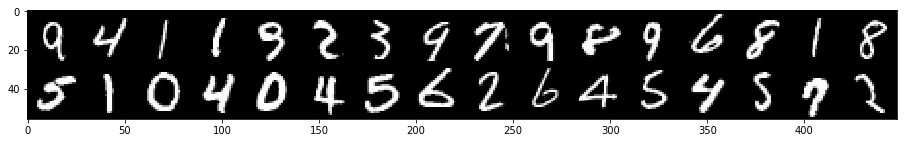

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

samples = np.concatenate([np.concatenate([X_train[i].reshape(28,28) for i in [int(random.random() * len(X_train)) for i in range(16)]], axis=1) for i in range(2)], axis=0)
plt.figure(figsize=(16,2))
plt.imshow(samples, cmap='gray')

In [5]:
# Multilayer Perceptron model
model = Sequential()
model.add( Dense(input_dim=784, units=625, kernel_initializer="normal", activation="sigmoid") )
model.add( Dense(input_dim=625, units=625, kernel_initializer="normal", activation="sigmoid") )
model.add( Dense(input_dim=625, units=10,  kernel_initializer="normal", activation="softmax") )
model.compile( optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'] )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 625)               490625    
_________________________________________________________________
dense_2 (Dense)              (None, 625)               391250    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6260      
Total params: 888,135
Trainable params: 888,135
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train
history = model.fit( X_train, Y_Train, epochs=nb_epoch, batch_size=batch_size, verbose=1 )

Epoch 1/10
60000/60000 [==============================] - 8s - loss: 1.9199 - acc: 0.4238     
Epoch 2/10
60000/60000 [==============================] - 7s - loss: 0.9317 - acc: 0.7792     
Epoch 3/10
60000/60000 [==============================] - 8s - loss: 0.5859 - acc: 0.8471     
Epoch 4/10
60000/60000 [==============================] - 8s - loss: 0.4721 - acc: 0.8713     
Epoch 5/10
60000/60000 [==============================] - 8s - loss: 0.4172 - acc: 0.8832     
Epoch 6/10
60000/60000 [==============================] - 8s - loss: 0.3853 - acc: 0.8910     
Epoch 7/10
60000/60000 [==============================] - 8s - loss: 0.3649 - acc: 0.8961     
Epoch 8/10
60000/60000 [==============================] - 8s - loss: 0.3500 - acc: 0.9000     
Epoch 9/10
60000/60000 [==============================] - 8s - loss: 0.3390 - acc: 0.9021     
Epoch 10/10
60000/60000 [==============================] - 8s - loss: 0.3296 - acc: 0.9053     


In [7]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

 9920/10000 [============================>.] - ETA: 0sSummary: Loss over the test dataset: 0.31, Accuracy: 0.91


With 100 epochs (instead of 10), the accuracy reaches 96%